# Import packages

In [41]:
# we will import everything here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from read_files import *
from linearmodel import *

%reload_ext autoreload
%autoreload 2

# Exploratory data analysis

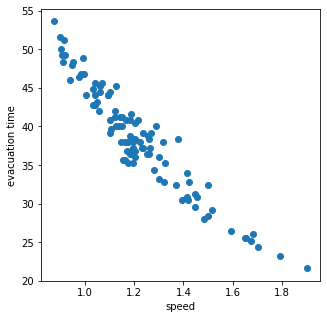

In [19]:
ped_speeds = [ np.mean(pedestrian["speedInAreaUsingAgentVelocity-PID6"]) for (_,pedestrian) in read_files("speeds.csv")]
ped_evacuationtime = [ np.mean(pedestrian["endTime-PID5"]) for (_,pedestrian) in read_files("endtimes.csv")]

fig, ax = plt.subplots(1,1, figsize=(5,5) )
ax.scatter(ped_speeds, ped_evacuationtime)
ax.set_xlabel("speed")
ax.set_ylabel("evacuation time")

fig.savefig("EDA.pdf")

# Learning the linear model

x_train shape (70,)
x_test shape (30,)


Text(0.5, 1.0, 'test set')

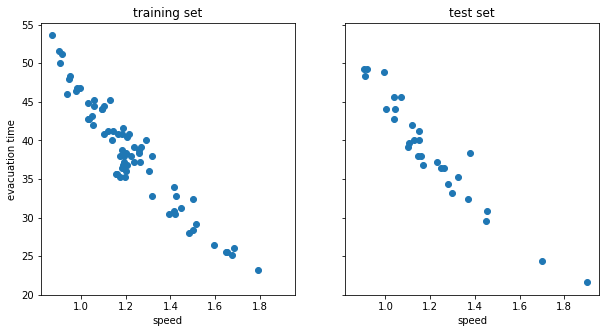

In [29]:
x_train, x_test, y_train, y_test = train_test_split(np.array(ped_speeds),
                                                    np.array(ped_evacuationtime),
                                                    train_size=.7)

print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True, sharex=True )
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel("speed")
ax[0].set_ylabel("evacuation time")
ax[0].set_title("training set")

ax[1].scatter(x_test, y_test)
ax[1].set_xlabel("speed")
ax[1].set_title("test set")

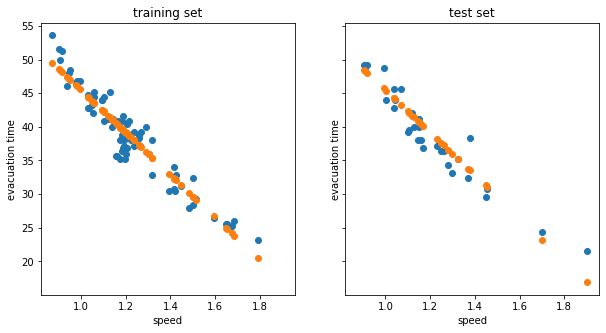

In [45]:
linear_model = LinearModel()

linear_model.fit(x_train, y_train)

y_train_estimate = linear_model.transform(x_train)
y_test_estimate = linear_model.transform(x_test)

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True, sharex=True )
ax[0].scatter(x_train, y_train)
ax[0].scatter(x_train, y_train_estimate)
ax[0].set_xlabel("speed")
ax[0].set_ylabel("evacuation time")
ax[0].set_title("training set")

ax[1].scatter(x_test, y_test)
ax[1].scatter(x_test, y_test_estimate)
ax[1].set_xlabel("speed")
ax[1].set_ylabel("evacuation time")
ax[1].set_title("test set")

fig.savefig("train_and_test.pdf")